# Reducing Traffic Mortality

In [1]:
#Importing the libraries required 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#importing the csv file i.e road-accidents.csv
rd_ac = pd.read_csv("road-accidents.csv",comment="#",sep="|")

# Save the number of rows columns as a tuple
rows_and_cols = rd_ac.shape
print('There are {} rows and {} columns.\n'.format(
    rows_and_cols[0], rows_and_cols[1]))

# Generate an overview of the DataFrame
rd_ac_information = rd_ac.info()
print(rd_ac_information)

# Displaying the first five rows
rd_ac.head()


There are 51 rows and 5 columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   state                 51 non-null     object 
 1   drvr_fatl_col_bmiles  51 non-null     float64
 2   perc_fatl_speed       51 non-null     int64  
 3   perc_fatl_alcohol     51 non-null     int64  
 4   perc_fatl_1st_time    51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB
None


,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
0,Alabama,18.8,39,30,80
1,Alaska,18.1,41,25,94
2,Arizona,18.6,35,28,96
3,Arkansas,22.4,18,26,95
4,California,12.0,35,28,89


In [3]:
# Displaying the last five rows
rd_ac.tail()

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
46,Virginia,12.7,19,27,88
47,Washington,10.6,42,33,86
48,West Virginia,23.8,34,28,87
49,Wisconsin,13.8,36,33,84
50,Wyoming,17.4,42,32,90


       drvr_fatl_col_bmiles  perc_fatl_speed  perc_fatl_alcohol  \
count             51.000000        51.000000          51.000000   
mean              15.790196        31.725490          30.686275   
std                4.122002         9.633438           5.132213   
min                5.900000        13.000000          16.000000   
25%               12.750000        23.000000          28.000000   
50%               15.600000        34.000000          30.000000   
75%               18.500000        38.000000          33.000000   
max               23.900000        54.000000          44.000000   

       perc_fatl_1st_time  
count            51.00000  
mean             88.72549  
std               6.96011  
min              76.00000  
25%              83.50000  
50%              88.00000  
75%              95.00000  
max             100.00000  


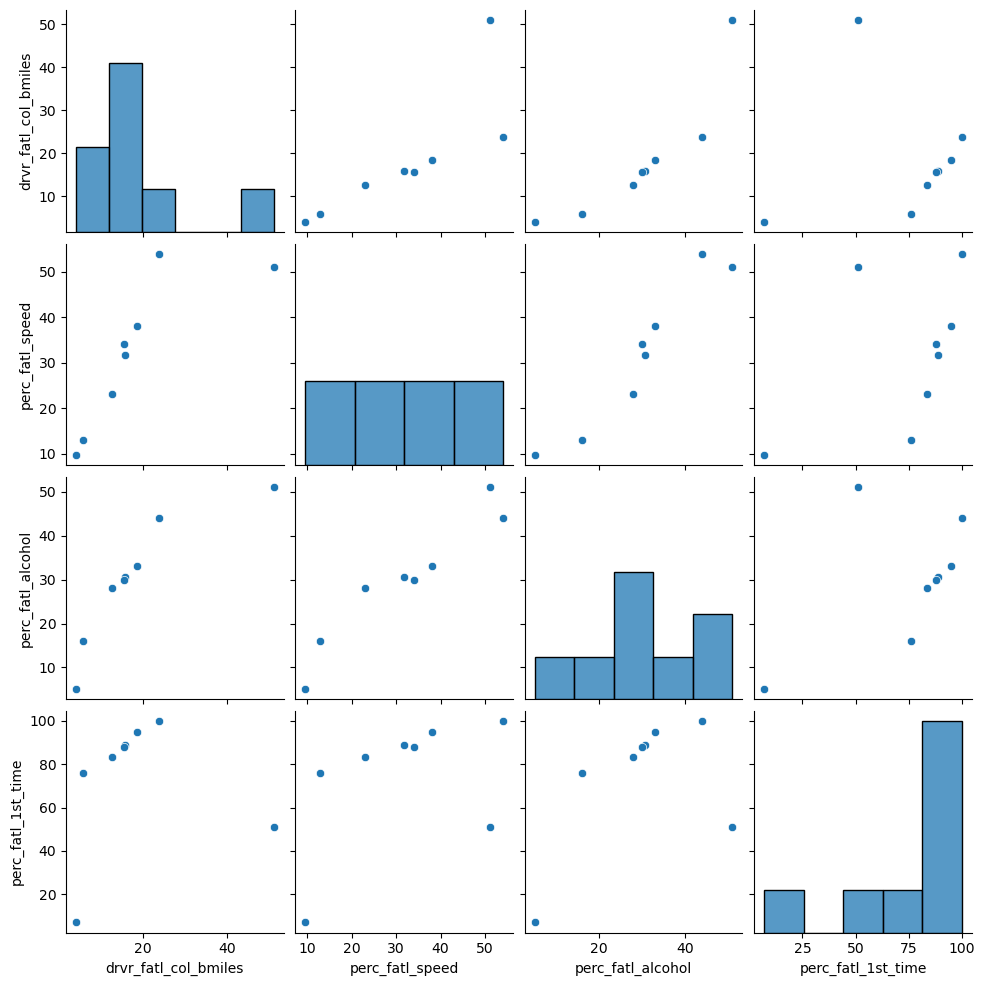

In [4]:
sum_stat = rd_ac.describe()
print(sum_stat)

# Create a pairwise scatter plot to explore the data
sns.pairplot(sum_stat)

In [6]:
# Calculating the correlation coefficent for all column pairs
corr_columns = rd_ac.corr()
corr_columns

,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
drvr_fatl_col_bmiles,1.000000,-0.029080,0.199426,-0.017942
perc_fatl_speed,-0.029080,1.000000,0.286244,0.014066
perc_fatl_alcohol,0.199426,0.286244,1.000000,-0.245455
perc_fatl_1st_time,-0.017942,0.014066,-0.245455,1.000000


In [7]:
# Import the linear model function from sklearn
from sklearn import linear_model

# Create the features and target DataFrames
features = rd_ac[['perc_fatl_speed','perc_fatl_alcohol','perc_fatl_1st_time']]
target = rd_ac['drvr_fatl_col_bmiles']

# Create a linear regression object
reg = linear_model.LinearRegression()

# Fit a multivariate linear regression model
reg.fit(features,target)
# Retrieve the regression coefficients
fit_coef = reg.coef_
fit_coef

array([-0.04180041,  0.19086404,  0.02473301])

The cumulative variance of the first two principal components is 0.7947


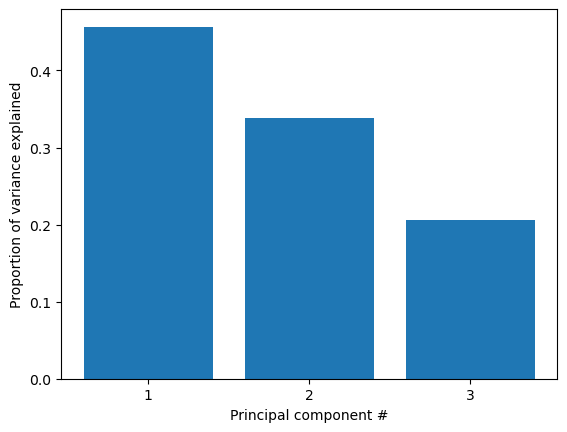

In [8]:
# Standardize and center the feature columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Import the PCA class function from sklearn
from sklearn.decomposition import PCA 
pca = PCA()

# Fit the standardized data to the pca
pca.fit(features_scaled)

# Plot the proportion of variance explained on the y-axis of the bar plot
import matplotlib.pyplot as plt
plt.bar(range(1, pca.n_components_ + 1),  pca.explained_variance_ratio_)
plt.xlabel('Principal component #')
plt.ylabel('Proportion of variance explained')
plt.xticks([1, 2, 3])

# Compute the cumulative proportion of variance explained by the first two principal components
two_first_comp_var_exp = pca.explained_variance_ratio_.cumsum()[1]
print("The cumulative variance of the first two principal components is {}".format(
    round(two_first_comp_var_exp, 5)))

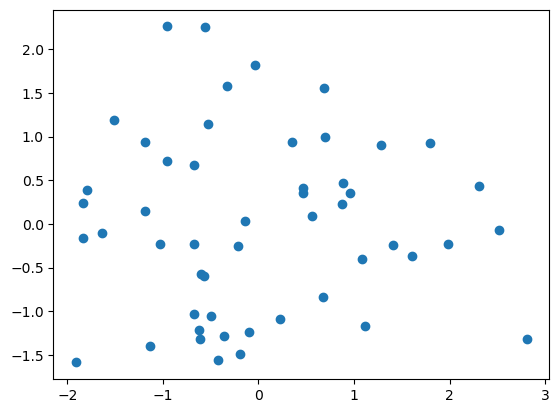

In [9]:
# Transform the scaled features using two principal components
pca = PCA(n_components=2)
p_comps = pca.fit_transform(features_scaled)

# Extract the first and second component to use for the scatter plot
p_comp1 = p_comps[:,0]
p_comp2 = p_comps[:,1]

# Plot the first two principal components in a scatter plot

plt.scatter(p_comp1,p_comp2)
plt.show()

C:\Users\heman\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


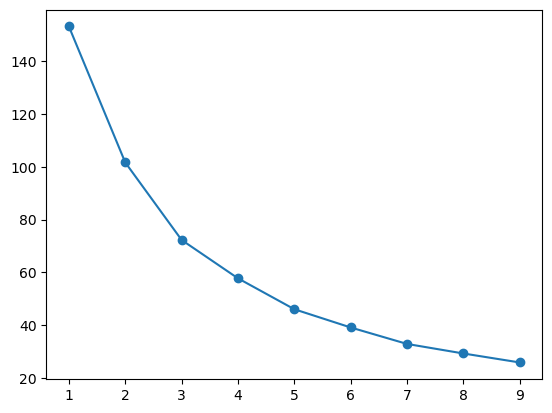

In [10]:
# Import KMeans from sklearn
from sklearn.cluster import KMeans
ks = range(1, 10)
inertias = []
for k in ks:
    # Initializing the KMeans object using the current number of clusters (k)
    km = KMeans(n_clusters=k, random_state=8)
    # Fit the scaled features to the KMeans object
    km.fit(features_scaled)
    # Append the inertia for `km` to the list of inertias
    inertias.append(km.inertia_)
    
# Plot the results in a line plot
plt.plot(ks, inertias, marker='o')

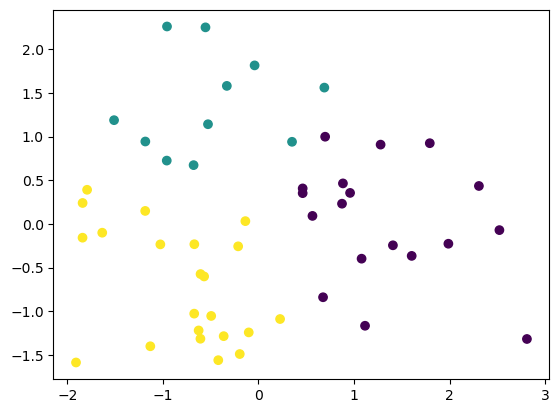

In [11]:
# Create a KMeans object with 3 clusters, use random_state=8 
km = KMeans(n_clusters=3,random_state=8)

# Fit the data to the `km` object
km.fit(features_scaled)

# Create a scatter plot of the first two principal components
# and color it according to the KMeans cluster assignment 
plt.scatter(p_comps[:,0],p_comps[:,1],c=km.labels_)

<AxesSubplot:xlabel='percent', ylabel='measurement'>

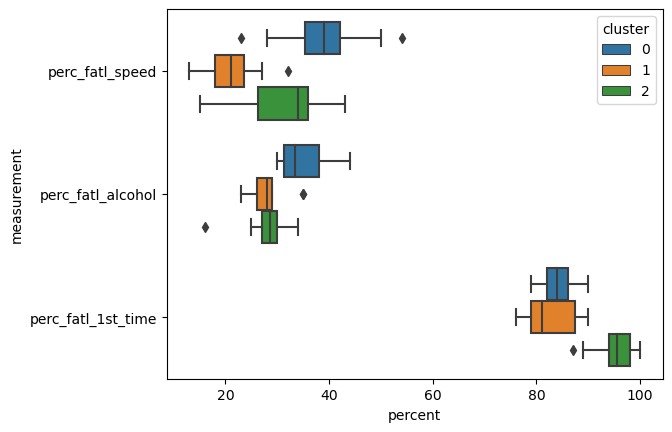

In [12]:
# Create a new column with the labels from the KMeans clustering
rd_ac['cluster'] = km.labels_

# Reshape the DataFrame to the long format
melt_car = pd.melt(rd_ac,id_vars='cluster',var_name="measurement",value_name="percent",
                 value_vars=['perc_fatl_speed', 'perc_fatl_alcohol', 'perc_fatl_1st_time'] )

# Create a violin plot splitting and coloring the results according to the km-clusters
sns.boxplot(data=melt_car,y='measurement',x='percent',hue='cluster')

,count,mean,sum
cluster,,,
0,18,911.406439,16405.3159
1,11,860.505945,9465.5654
2,22,898.378595,19764.3291


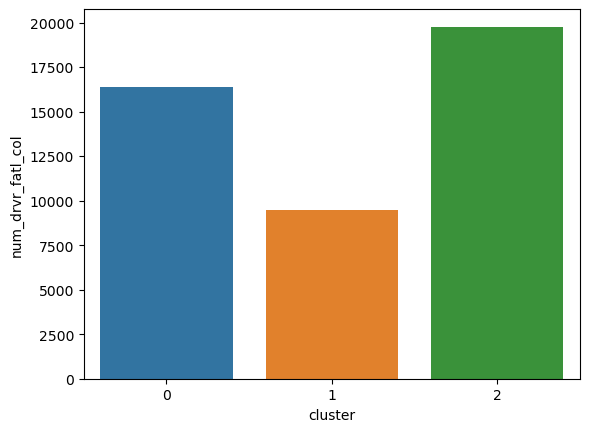

In [15]:

miles_d = pd.read_csv('miles-driven.csv', sep='|')

# Merge the `car_acc` DataFrame with the `miles_driven` DataFrame
rd_ac_miles = rd_ac.merge(miles_d,on="state")

# Create a new column for the number of drivers involved in fatal accidents
rd_ac_miles['num_drvr_fatl_col'] = (rd_ac_miles['million_miles_annually']*rd_ac_miles['drvr_fatl_col_bmiles'])/1000

# Create a barplot of the total number of accidents per cluster
sns.barplot(x='cluster', y='num_drvr_fatl_col', data=rd_ac_miles, estimator=sum, ci=None)

# Calculate the number of states in each cluster and their 'num_drvr_fatl_col' mean and sum.
count_mean_sum = rd_ac_miles.groupby('cluster')['num_drvr_fatl_col'].agg(['count', 'mean', 'sum'])
count_mean_sum